In [ ]:
import numpy as np 
import pandas as pd
import matplotlib as mp
import math as mt
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
import missingno as msno
import random as rn

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/raw_house_data.csv .csv')

In [ ]:
df.head()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-1.103.782,31.356.362,2154.00,5272.00,1941,13,10,10500,0,"Dishwasher, Freezer, Refrigerator, Oven",6.0,"Mexican Tile, Wood",0
1,21529082,4200000.0,85646,-111.045.371,31.594.213,1707.00,10422.36,1997,2,2,7300,0,"Dishwasher, Garbage Disposal",5.0,"Natural Stone, Other",0
2,3054672,4200000.0,85646,-111.040.707,31.594.844,1707.00,10482.00,1997,2,3,None,None,"Dishwasher, Garbage Disposal, Refrigerator",5.0,"Natural Stone, Other: Rock",None
3,21919321,4500000.0,85646,-111.035.925,31.645.878,636.67,8418.58,1930,7,5,9019,4,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4.0,"Ceramic Tile, Laminate, Wood",None
4,21306357,3411450.0,85750,-110.813.768,32.285.162,3.21,15393.00,1995,4,6,6396,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Carpet, Concrete",55


In [ ]:
df.tail()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
4995,21810382,495000.0,85641,-110.661.829,31.907.917,4.98,2017.00,2005,5,3,3601,3,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1.0,"Carpet, Ceramic Tile",None
4996,21908591,550000.0,85750,-110.858.556,32.316.373,1.42,4822.01,1990,4,3,2318,3,"Dishwasher, Double Sink, Electric Range, Garba...",1.0,"Carpet, Ceramic Tile",43
4997,21832452,475000.0,85192,-110.755.428,32.964.708,12.06,1000.00,1969,3,2,1772,0,"Dishwasher, Electric Range, Island, Refrigerat...",0.0,Ceramic Tile,None
4998,21900515,550000.0,85745,-111.055.528,32.296.871,1.01,5822.93,2009,4,4,3724,3,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1.0,"Carpet, Ceramic Tile",None
4999,4111490,450000.0,85621,-110.913.054,31.385.259,4.16,2814.48,1988,4,4,4317,None,"Compactor, Dishwasher, Double Sink, Island, Ap...",3.0,"Carpet, Mexican Tile",None


In [ ]:
df.shape

(5000, 16)

In [ ]:
df.columns

Index(['MLS', 'sold_price', 'zipcode', 'longitude', 'latitude', 'lot_acres',
       'taxes', 'year_built', 'bedrooms', 'bathrooms', 'sqrt_ft', 'garage',
       'kitchen_features', 'fireplaces', 'floor_covering', 'HOA'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MLS               5000 non-null   int64  
 1   sold_price        5000 non-null   float64
 2   zipcode           5000 non-null   int64  
 3   longitude         5000 non-null   object 
 4   latitude          5000 non-null   object 
 5   lot_acres         4990 non-null   float64
 6   taxes             5000 non-null   float64
 7   year_built        5000 non-null   int64  
 8   bedrooms          5000 non-null   int64  
 9   bathrooms         5000 non-null   object 
 10  sqrt_ft           5000 non-null   object 
 11  garage            5000 non-null   object 
 12  kitchen_features  5000 non-null   object 
 13  fireplaces        4975 non-null   float64
 14  floor_covering    5000 non-null   object 
 15  HOA               5000 non-null   object 
dtypes: float64(4), int64(4), object(8)
memory 

In [ ]:
df.describe()

,MLS,sold_price,zipcode,lot_acres,taxes,year_built,bedrooms,fireplaces
count,5.000000e+03,5.000000e+03,5000.000000,4990.000000,5.000000e+03,5000.00000,5000.000000,4975.000000
mean,2.127070e+07,7.746262e+05,85723.025600,4.661317,9.402828e+03,1992.32800,3.933800,1.885226
std,2.398508e+06,3.185556e+05,38.061712,51.685230,1.729385e+05,65.48614,1.245362,1.136578
min,3.042851e+06,1.690000e+05,85118.000000,0.000000,0.000000e+00,0.00000,1.000000,0.000000
25%,2.140718e+07,5.850000e+05,85718.000000,0.580000,4.803605e+03,1987.00000,3.000000,1.000000
50%,2.161469e+07,6.750000e+05,85737.000000,0.990000,6.223760e+03,1999.00000,4.000000,2.000000
75%,2.180480e+07,8.350000e+05,85749.000000,1.757500,8.082830e+03,2006.00000,4.000000,3.000000
max,2.192856e+07,5.300000e+06,86323.000000,2154.000000,1.221508e+07,2019.00000,36.000000,9.000000


In [ ]:
df['HOA'].value_counts(dropna=False)

0         824
None      562
5         123
100       107
50         85
         ... 
178         1
69.16       1
332.67      1
43.01       1
78.65       1
Name: HOA, Length: 378, dtype: int64

In [ ]:
df['fireplaces'].value_counts(dropna=False)

1.0    1806
2.0    1604
3.0     849
0.0     303
4.0     294
5.0      89
NaN      25
6.0      18
7.0       9
9.0       2
8.0       1
Name: fireplaces, dtype: int64

In [ ]:
df['lot_acres'].value_counts(dropna=False)

1.00     135
0.83      90
3.31      69
3.30      64
0.80      59
        ... 
8.11       1
5.19       1
2.39       1
6.11       1
12.06      1
Name: lot_acres, Length: 646, dtype: int64

In [ ]:
df['garage'].value_counts(dropna=False)

3       2797
2       1337
4        383
0        184
5         88
6         61
2.5       48
1         30
3.5       16
8         14
7         13
None       7
9          6
4.5        4
12         3
10         3
15         1
22         1
30         1
11         1
20         1
13         1
Name: garage, dtype: int64

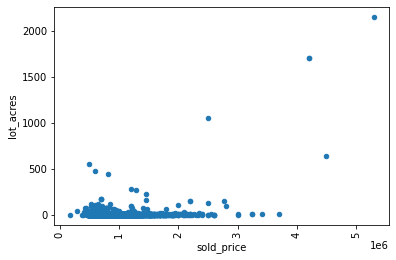

In [ ]:
df.plot(kind='scatter', x='sold_price', y='lot_acres', rot=90)

In [ ]:
df.head()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-1.103.782,31.356.362,2154.00,5272.00,1941,13,10,10500,0,"Dishwasher, Freezer, Refrigerator, Oven",6.0,"Mexican Tile, Wood",0
1,21529082,4200000.0,85646,-111.045.371,31.594.213,1707.00,10422.36,1997,2,2,7300,0,"Dishwasher, Garbage Disposal",5.0,"Natural Stone, Other",0
2,3054672,4200000.0,85646,-111.040.707,31.594.844,1707.00,10482.00,1997,2,3,None,None,"Dishwasher, Garbage Disposal, Refrigerator",5.0,"Natural Stone, Other: Rock",None
3,21919321,4500000.0,85646,-111.035.925,31.645.878,636.67,8418.58,1930,7,5,9019,4,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4.0,"Ceramic Tile, Laminate, Wood",None
4,21306357,3411450.0,85750,-110.813.768,32.285.162,3.21,15393.00,1995,4,6,6396,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Carpet, Concrete",55


In [ ]:
df.row = df.columns

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [ ]:
#Calculate the missing value
newval = df.isna().sum()
newval
#New df with the name of the column is = df origin with ["the name of column that i need to chenge"]
dfHOA = df["HOA"]
dfHOA

0          0
1          0
2       None
3       None
4         55
        ... 
4995    None
4996      43
4997    None
4998    None
4999    None
Name: HOA, Length: 5000, dtype: object

In [ ]:
df.describe()
#Describe again the records to see the changes

,MLS,sold_price,zipcode,lot_acres,taxes,year_built,bedrooms,fireplaces
count,5.000000e+03,5.000000e+03,5000.000000,4990.000000,5.000000e+03,5000.00000,5000.000000,4975.000000
mean,2.127070e+07,7.746262e+05,85723.025600,4.661317,9.402828e+03,1992.32800,3.933800,1.885226
std,2.398508e+06,3.185556e+05,38.061712,51.685230,1.729385e+05,65.48614,1.245362,1.136578
min,3.042851e+06,1.690000e+05,85118.000000,0.000000,0.000000e+00,0.00000,1.000000,0.000000
25%,2.140718e+07,5.850000e+05,85718.000000,0.580000,4.803605e+03,1987.00000,3.000000,1.000000
50%,2.161469e+07,6.750000e+05,85737.000000,0.990000,6.223760e+03,1999.00000,4.000000,2.000000
75%,2.180480e+07,8.350000e+05,85749.000000,1.757500,8.082830e+03,2006.00000,4.000000,3.000000
max,2.192856e+07,5.300000e+06,86323.000000,2154.000000,1.221508e+07,2019.00000,36.000000,9.000000


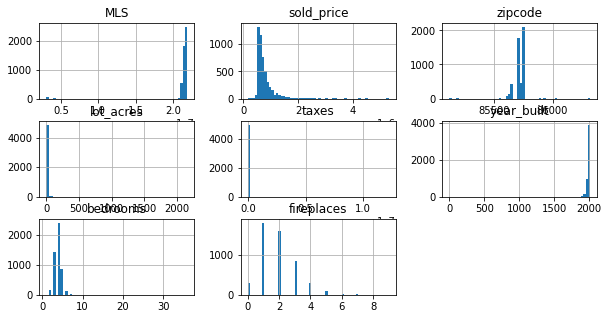

In [ ]:
grap = df.hist(bins=60, figsize= (10,5))
# Show the grapics is as plt=show()

In [ ]:
df['bathrooms'].replace('None', np.nan, inplace=True)
df['sqrt_ft'].replace('None', np.nan, inplace=True)
df['garage'].replace('None', np.nan, inplace=True)
df['HOA'].replace('None', np.nan, inplace=True)
# Replace the strings none to values none

In [ ]:
df['HOA'].sort_values().unique()
# Extrat how many values (same values- 3 rows with the number 10) have the column

array(['0', '02.08', '1', '1,01', '1,1', '1,2', '1,27', '1,29', '1,6',
       '1,717', '1,769', '10', '10.83', '100', '101', '102', '103', '104',
       '105', '106', '107', '108', '109', '11', '11.08', '110', '111',
       '112', '112.38', '113', '114', '115', '116', '117', '118', '119',
       '119.66', '12', '120', '121', '122', '123', '123.44', '124', '125',
       '126', '127', '128', '129', '13', '130', '131', '132', '132.66',
       '133', '134', '134.5', '135', '136', '137', '138', '139', '14',
       '14.58', '140', '141', '141.66', '141.67', '142', '143', '144',
       '145', '145.83', '146', '147', '148', '149', '149.04', '149.5',
       '15', '15.41', '15.45', '150', '151', '152', '153', '154', '155',
       '156', '157', '157.33', '158', '159', '16', '16.66', '16.67',
       '160', '161', '162', '164', '165', '166', '166.66', '167', '168',
       '168.92', '169', '17', '170', '171', '172', '173', '174', '175',
       '176', '177', '177.34', '178', '179', '18', '18.75', '18

In [ ]:
len(df['HOA'].sort_values().unique())
# Length of all datas (by example, 2 rows with the number 3, 5 rows with the number 5, total 31 data)

378

In [ ]:
newval2=df.isna().sum()

In [ ]:
df.dtypes

MLS                   int64
sold_price          float64
zipcode               int64
longitude            object
latitude             object
lot_acres           float64
taxes               float64
year_built            int64
bedrooms              int64
bathrooms            object
sqrt_ft              object
garage               object
kitchen_features     object
fireplaces          float64
floor_covering       object
HOA                  object
dtype: object

In [ ]:
df['sqrt_ft'] = df.sqrt_ft.astype(float)
# of my df ['name of column that i what to change'] is = df by the name of the column that i want to change by astype [ type of value]
df['bathrooms'] = df.sqrt_ft.astype(float)
df['garage'] = df.sqrt_ft.astype(float)
for HOA in df:
  df['HOA'].unique()

In [ ]:
df['HOA'] = df['HOA'].replace(',','', regex=True)
df['HOA'] = df.HOA.astype(float)
df.dtypes

MLS                   int64
sold_price          float64
zipcode               int64
longitude            object
latitude             object
lot_acres           float64
taxes               float64
year_built            int64
bedrooms              int64
bathrooms           float64
sqrt_ft             float64
garage              float64
kitchen_features     object
fireplaces          float64
floor_covering       object
HOA                 float64
dtype: object

In [ ]:
val_column = df['HOA'].value_counts()
val_column
# Get the series of unique values


0.00      824
5.00      123
100.00    107
50.00      85
40.00      72
         ... 
43.71       1
69.16       1
332.67      1
43.01       1
78.65       1
Name: HOA, Length: 370, dtype: int64

In [ ]:
val_column = df['sqrt_ft'].value_counts()
val_column
# Get the series of unique values

3541.0    50
3052.0    25
3420.0    18
3002.0    16
3811.0    16
          ..
4362.0     1
5586.0     1
5117.0     1
3793.0     1
1772.0     1
Name: sqrt_ft, Length: 2361, dtype: int64

In [ ]:
df['HOA'] = df['HOA'].replace(np.nan, 0, regex=True)
df['HOA']
# Replace is (np.nan, the new value that I need to put (by example: 'old', 'value', 5, 7), regex=True)

0        0.0
1        0.0
2        0.0
3        0.0
4       55.0
        ... 
4995     0.0
4996    43.0
4997     0.0
4998     0.0
4999     0.0
Name: HOA, Length: 5000, dtype: float64

In [ ]:
newval2 = df.isna().sum()
newval2

MLS                  0
sold_price           0
zipcode              0
longitude            0
latitude             0
lot_acres           10
taxes                0
year_built           0
bedrooms             0
bathrooms           56
sqrt_ft             56
garage              56
kitchen_features     0
fireplaces          25
floor_covering       0
HOA                  0
dtype: int64

In [ ]:
df['lot_acres'] = df['lot_acres'].replace(np.nan, 0, regex=True)


In [ ]:
df.dtypes

MLS                   int64
sold_price          float64
zipcode               int64
longitude            object
latitude             object
lot_acres           float64
taxes               float64
year_built            int64
bedrooms              int64
bathrooms           float64
sqrt_ft             float64
garage              float64
kitchen_features     object
fireplaces          float64
floor_covering       object
HOA                 float64
dtype: object

In [ ]:
df['bathrooms'] = df['bathrooms'].replace(np.nan, 0, regex=True)

In [ ]:
df.dtypes

MLS                   int64
sold_price          float64
zipcode               int64
longitude            object
latitude             object
lot_acres           float64
taxes               float64
year_built            int64
bedrooms              int64
bathrooms           float64
sqrt_ft             float64
garage              float64
kitchen_features     object
fireplaces          float64
floor_covering       object
HOA                 float64
dtype: object

In [ ]:
df.tail(10)

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
4990,21906583,526710.0,85748,-11.072.839,32.221.871,9.18,3390.67,1960,4,2284.0,2284.0,2284.0,"Dishwasher, Electric Range, Refrigerator, Coun...",1.0,"Ceramic Tile, Concrete",0.00
4991,3052471,525000.0,85622,-111.038.888,31.791.324,0.95,3919.93,2010,3,0.0,NaN,NaN,"Dishwasher, Double Sink, Electric Range, Garba...",1.0,"Carpet, Other: Marble",78.65
4992,3056450,525000.0,85614,-110.980.945,31.824.287,3.01,5122.84,2007,3,0.0,NaN,NaN,"Dishwasher, Garbage Disposal, Gas Range, Refri...",1.0,"Concrete, Other: Cork",37.00
4993,21908358,565000.0,85750,-110.820.216,32.307.646,0.83,4568.71,1986,4,2813.0,2813.0,2813.0,"Dishwasher, Double Sink, Electric Range, Garba...",2.0,"Carpet, Mexican Tile",6.00
4994,21909379,535000.0,85718,-110.922.291,32.317.496,0.18,4414.00,2002,3,2106.0,2106.0,2106.0,"Dishwasher, Double Sink, Electric Range, Garba...",1.0,Ceramic Tile,198.00
4995,21810382,495000.0,85641,-110.661.829,31.907.917,4.98,2017.00,2005,5,3601.0,3601.0,3601.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1.0,"Carpet, Ceramic Tile",0.00
4996,21908591,550000.0,85750,-110.858.556,32.316.373,1.42,4822.01,1990,4,2318.0,2318.0,2318.0,"Dishwasher, Double Sink, Electric Range, Garba...",1.0,"Carpet, Ceramic Tile",43.00
4997,21832452,475000.0,85192,-110.755.428,32.964.708,12.06,1000.00,1969,3,1772.0,1772.0,1772.0,"Dishwasher, Electric Range, Island, Refrigerat...",0.0,Ceramic Tile,0.00
4998,21900515,550000.0,85745,-111.055.528,32.296.871,1.01,5822.93,2009,4,3724.0,3724.0,3724.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1.0,"Carpet, Ceramic Tile",0.00
4999,4111490,450000.0,85621,-110.913.054,31.385.259,4.16,2814.48,1988,4,4317.0,4317.0,4317.0,"Compactor, Dishwasher, Double Sink, Island, Ap...",3.0,"Carpet, Mexican Tile",0.00


In [ ]:
df['HOA'] = df['HOA'].astype(float, errors='raise')
#Replace object for float


In [ ]:
df.dtypes

MLS                   int64
sold_price          float64
zipcode               int64
longitude            object
latitude             object
lot_acres           float64
taxes               float64
year_built            int64
bedrooms              int64
bathrooms           float64
sqrt_ft             float64
garage              float64
kitchen_features     object
fireplaces          float64
floor_covering       object
HOA                 float64
dtype: object

In [ ]:
df.head()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-1.103.782,31.356.362,2154.00,5272.00,1941,13,10500.0,10500.0,10500.0,"Dishwasher, Freezer, Refrigerator, Oven",6.0,"Mexican Tile, Wood",0.0
1,21529082,4200000.0,85646,-111.045.371,31.594.213,1707.00,10422.36,1997,2,7300.0,7300.0,7300.0,"Dishwasher, Garbage Disposal",5.0,"Natural Stone, Other",0.0
2,3054672,4200000.0,85646,-111.040.707,31.594.844,1707.00,10482.00,1997,2,0.0,NaN,NaN,"Dishwasher, Garbage Disposal, Refrigerator",5.0,"Natural Stone, Other: Rock",0.0
3,21919321,4500000.0,85646,-111.035.925,31.645.878,636.67,8418.58,1930,7,9019.0,9019.0,9019.0,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4.0,"Ceramic Tile, Laminate, Wood",0.0
4,21306357,3411450.0,85750,-110.813.768,32.285.162,3.21,15393.00,1995,4,6396.0,6396.0,6396.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Carpet, Concrete",55.0


In [ ]:
df["sqrt_ft"] = df["sqrt_ft"].replace(np.nan, 0, regex=True)
df['sqrt_ft']

0       10500.0
1        7300.0
2           0.0
3        9019.0
4        6396.0
         ...   
4995     3601.0
4996     2318.0
4997     1772.0
4998     3724.0
4999     4317.0
Name: sqrt_ft, Length: 5000, dtype: float64

In [ ]:
df['sqrt_ft'] = df['sqrt_ft'].astype(float, errors='raise')
#Replace object for float

In [ ]:
df.head(10)

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-1.103.782,31.356.362,2154.00,5272.00,1941,13,10500.0,10500.0,10500.0,"Dishwasher, Freezer, Refrigerator, Oven",6.0,"Mexican Tile, Wood",0.00
1,21529082,4200000.0,85646,-111.045.371,31.594.213,1707.00,10422.36,1997,2,7300.0,7300.0,7300.0,"Dishwasher, Garbage Disposal",5.0,"Natural Stone, Other",0.00
2,3054672,4200000.0,85646,-111.040.707,31.594.844,1707.00,10482.00,1997,2,0.0,0.0,NaN,"Dishwasher, Garbage Disposal, Refrigerator",5.0,"Natural Stone, Other: Rock",0.00
3,21919321,4500000.0,85646,-111.035.925,31.645.878,636.67,8418.58,1930,7,9019.0,9019.0,9019.0,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4.0,"Ceramic Tile, Laminate, Wood",0.00
4,21306357,3411450.0,85750,-110.813.768,32.285.162,3.21,15393.00,1995,4,6396.0,6396.0,6396.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Carpet, Concrete",55.00
5,21528016,3250000.0,85718,-110.910.593,3.233.909,1.67,27802.84,1999,3,6842.0,6842.0,6842.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Natural Stone, Wood, Other",422.00
6,21610478,2400000.0,85712,-110.883.315,32.261.069,2.10,19038.42,2001,9,12025.0,12025.0,12025.0,"Dishwasher, Garbage Disposal, Oven",6.0,"Carpet, Natural Stone, Wood, Other",0.00
7,21211741,2500000.0,85750,-110.861.002,32.331.603,1.07,21646.00,2011,6,8921.0,8921.0,8921.0,"Compactor, Dishwasher, Freezer, Garbage Dispos...",5.0,"Carpet, Natural Stone, Wood",220.00
8,21324646,3700000.0,85718,-110.912.156,32.343.601,6.73,25094.39,2002,5,5238.0,5238.0,5238.0,"Compactor, Dishwasher, Freezer, Garbage Dispos...",1.0,"Carpet, Natural Stone, Wood, Other",421.00
9,21812010,3250000.0,85750,-11.083.795,32.327.575,3.53,18936.11,2007,5,6480.0,6480.0,6480.0,"Dishwasher, Double Sink, Electric Range, Freez...",2.0,"Carpet, Concrete",141.67


In [ ]:
df["garage"] = df["garage"].replace(np.nan, 0, regex=True)
df['garage']

0       10500.0
1        7300.0
2           0.0
3        9019.0
4        6396.0
         ...   
4995     3601.0
4996     2318.0
4997     1772.0
4998     3724.0
4999     4317.0
Name: garage, Length: 5000, dtype: float64

In [ ]:
df['sqrt_ft'] = df['sqrt_ft'].astype(float, errors='raise')
#Replace object for float

In [ ]:
df.head(10)

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-1.103.782,31.356.362,2154.00,5272.00,1941,13,10500.0,10500.0,10500.0,"Dishwasher, Freezer, Refrigerator, Oven",6.0,"Mexican Tile, Wood",0.00
1,21529082,4200000.0,85646,-111.045.371,31.594.213,1707.00,10422.36,1997,2,7300.0,7300.0,7300.0,"Dishwasher, Garbage Disposal",5.0,"Natural Stone, Other",0.00
2,3054672,4200000.0,85646,-111.040.707,31.594.844,1707.00,10482.00,1997,2,0.0,0.0,0.0,"Dishwasher, Garbage Disposal, Refrigerator",5.0,"Natural Stone, Other: Rock",0.00
3,21919321,4500000.0,85646,-111.035.925,31.645.878,636.67,8418.58,1930,7,9019.0,9019.0,9019.0,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4.0,"Ceramic Tile, Laminate, Wood",0.00
4,21306357,3411450.0,85750,-110.813.768,32.285.162,3.21,15393.00,1995,4,6396.0,6396.0,6396.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Carpet, Concrete",55.00
5,21528016,3250000.0,85718,-110.910.593,3.233.909,1.67,27802.84,1999,3,6842.0,6842.0,6842.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Natural Stone, Wood, Other",422.00
6,21610478,2400000.0,85712,-110.883.315,32.261.069,2.10,19038.42,2001,9,12025.0,12025.0,12025.0,"Dishwasher, Garbage Disposal, Oven",6.0,"Carpet, Natural Stone, Wood, Other",0.00
7,21211741,2500000.0,85750,-110.861.002,32.331.603,1.07,21646.00,2011,6,8921.0,8921.0,8921.0,"Compactor, Dishwasher, Freezer, Garbage Dispos...",5.0,"Carpet, Natural Stone, Wood",220.00
8,21324646,3700000.0,85718,-110.912.156,32.343.601,6.73,25094.39,2002,5,5238.0,5238.0,5238.0,"Compactor, Dishwasher, Freezer, Garbage Dispos...",1.0,"Carpet, Natural Stone, Wood, Other",421.00
9,21812010,3250000.0,85750,-11.083.795,32.327.575,3.53,18936.11,2007,5,6480.0,6480.0,6480.0,"Dishwasher, Double Sink, Electric Range, Freez...",2.0,"Carpet, Concrete",141.67
